In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib.colors import ListedColormap
import plotly.graph_objs as go

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from skorch import NeuralNetRegressor
from sklearn.linear_model import LinearRegression

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, Dataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
import joblib

sns.set(style='whitegrid')

In [17]:
df1 = pd.read_csv('Datasets/direct1.csv')
df2 = pd.read_csv('Datasets/direct2.csv')
df3 = pd.read_csv('Datasets/indirect1.csv')
df4 = pd.read_csv('Datasets/indirect2.csv')
df4 = df4.rename(columns={'Pore radius [nm]': 'Pore diameter [nm]'})

In [18]:
df2.dropna(inplace=True)
df4.dropna(inplace=True)

In [19]:
# Function to preprocess data
def preprocess_data(df, features, target):
    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test


In [20]:
cols_2 = ['Permeability [nD]', 'Porosity [%]']
cols_5 = ['Permeability [nD]', 'Porosity [%]', 'SSA [m2g-1]', 'Pore diameter [nm]', 'Clay content [%]']
target = 'Breakthrough pressure [MPa]'

In [21]:
# Preprocess df1
X_train_1, X_test_1, y_train_1, y_test_1 = preprocess_data(df1, cols_2, target)

# Preprocess df3
X_train_3, X_test_3, y_train_3, y_test_3 = preprocess_data(df3, cols_2, target)

# Fit regression model for df1
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)
y_pred_1 = model_1.predict(X_test_1)

# Fit regression model for df3
model_3 = LinearRegression()
model_3.fit(X_train_3, y_train_3)
y_pred_3 = model_3.predict(X_test_3)

# Evaluate df1 model
mse_1 = mean_squared_error(y_test_1, y_pred_1)
print(f'Mean Squared Error for df1: {mse_1}')

# Evaluate df3 model
mse_3 = mean_squared_error(y_test_3, y_pred_3)
print(f'Mean Squared Error for df3: {mse_3}')

Mean Squared Error for df1: 7.440099237047317
Mean Squared Error for df3: 1991.5083736135814


In [22]:
# Preprocess df2
X_train_2, X_test_2, y_train_2, y_test_2 = preprocess_data(df2, cols_5, target)
# Preprocess df4
X_train_4, X_test_4, y_train_4, y_test_4 = preprocess_data(df4, cols_5, target)

# Fit regression model for df2
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)
y_pred_2 = model_2.predict(X_test_2)

# Fit regression model for df4
model_4 = LinearRegression()
model_4.fit(X_train_4, y_train_4)
y_pred_4 = model_4.predict(X_test_4)

# Evaluate df2 model
mse_2 = mean_squared_error(y_test_2, y_pred_2)
print(f'Mean Squared Error for df2: {mse_2}')

# Evaluate df4 model
mse_4 = mean_squared_error(y_test_4, y_pred_4)
print(f'Mean Squared Error for df4: {mse_4}')

Mean Squared Error for df2: 9.039925605781406
Mean Squared Error for df4: 38.1173968712328


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fit and evaluate df1
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)
y_pred_1 = model_1.predict(X_test_1)

mae_1 = mean_absolute_error(y_test_1, y_pred_1)
mse_1 = mean_squared_error(y_test_1, y_pred_1)
r2_1 = r2_score(y_test_1, y_pred_1)

print(f'df1 - MAE: {mae_1}, MSE: {mse_1}, R²: {r2_1}')

# Fit and evaluate df3
model_3 = LinearRegression()
model_3.fit(X_train_3, y_train_3)
y_pred_3 = model_3.predict(X_test_3)

mae_3 = mean_absolute_error(y_test_3, y_pred_3)
mse_3 = mean_squared_error(y_test_3, y_pred_3)
r2_3 = r2_score(y_test_3, y_pred_3)

print(f'df3 - MAE: {mae_3}, MSE: {mse_3}, R²: {r2_3}')

df1 - MAE: 1.9840151774311416, MSE: 7.440099237047317, R²: 0.40510470139621935
df3 - MAE: 27.886721883642316, MSE: 1991.5083736135814, R²: -0.06376863728611681


In [24]:
# Fit and evaluate df2
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)
y_pred_2 = model_2.predict(X_test_2)

mae_2 = mean_absolute_error(y_test_2, y_pred_2)
mse_2 = mean_squared_error(y_test_2, y_pred_2)
r2_2 = r2_score(y_test_2, y_pred_2)

print(f'df2 - MAE: {mae_2}, MSE: {mse_2}, R²: {r2_2}')

# Fit and evaluate df4
model_4 = LinearRegression()
model_4.fit(X_train_4, y_train_4)
y_pred_4 = model_4.predict(X_test_4)

mae_4 = mean_absolute_error(y_test_4, y_pred_4)
mse_4 = mean_squared_error(y_test_4, y_pred_4)
r2_4 = r2_score(y_test_4, y_pred_4)

print(f'df4 - MAE: {mae_4}, MSE: {mse_4}, R²: {r2_4}')

df2 - MAE: 2.5164782890483486, MSE: 9.039925605781406, R²: 0.24199982086282124
df4 - MAE: 5.58098713843312, MSE: 38.1173968712328, R²: 0.2368318237288911


/var/folders/xp/jy5j7tmd2c7bsktzm4pdpxm40000gn/T/ipykernel_42037/3853295851.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'k--', lw=2, color='red')


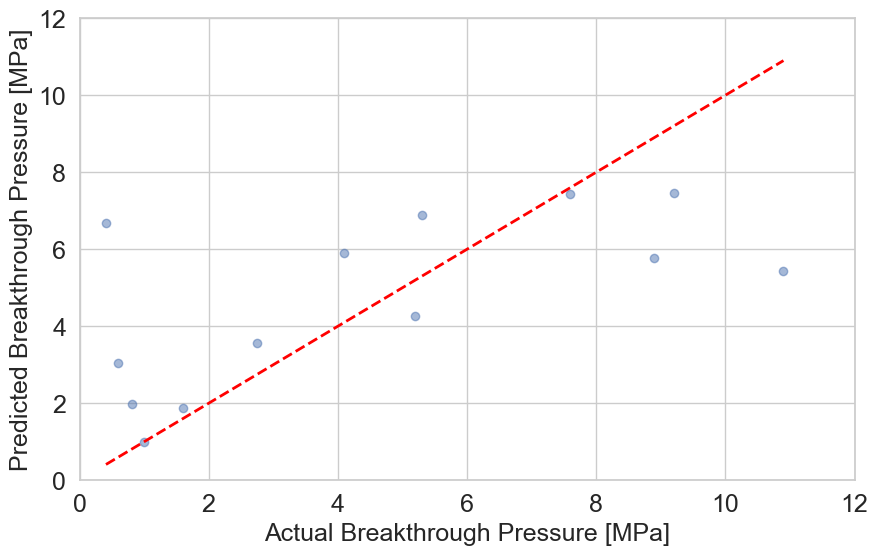

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_1, y_pred_1, alpha=0.5)

plt.plot([y_test_1.min(), y_test_1.max()], [y_test_1.min(), y_test_1.max()], 'k--', lw=2, color='red')

plt.xlim([0, 12])
plt.ylim([0, 12])

plt.xlabel('Actual Breakthrough Pressure [MPa]', fontsize=18)
plt.ylabel('Predicted Breakthrough Pressure [MPa]', fontsize=18)
plt.title('', fontsize=18)

plt.xticks(np.arange(0, 14, 2), fontsize=18)
plt.yticks(np.arange(0, 14, 2), fontsize=18)
plt.show()


/var/folders/xp/jy5j7tmd2c7bsktzm4pdpxm40000gn/T/ipykernel_42037/3739326227.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'k--', lw=2, color='red')


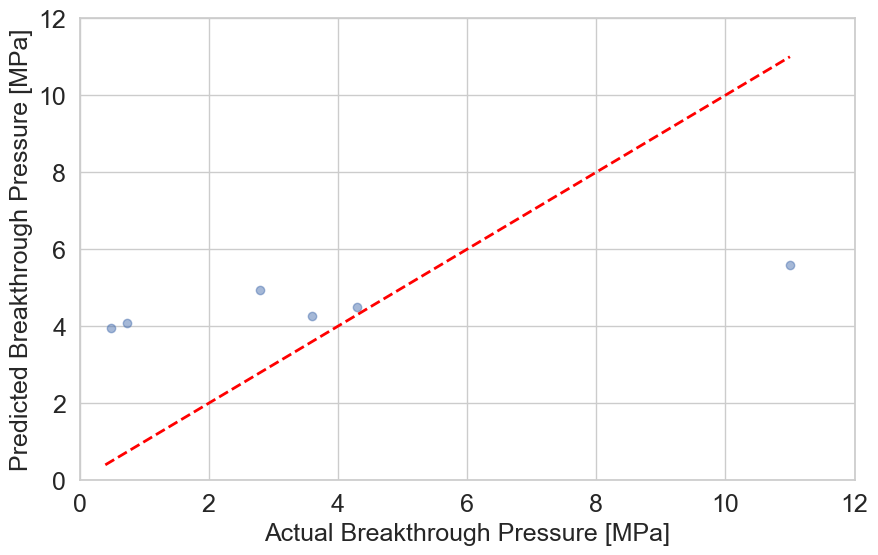

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_2, y_pred_2, alpha=0.5)

plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'k--', lw=2, color='red')

plt.xlim([0, 12])
plt.ylim([0, 12])

plt.xlabel('Actual Breakthrough Pressure [MPa]', fontsize=18)
plt.ylabel('Predicted Breakthrough Pressure [MPa]', fontsize=18)
plt.title('', fontsize=18)

plt.xticks(np.arange(0, 14, 2), fontsize=18)
plt.yticks(np.arange(0, 14, 2), fontsize=18)
plt.show()

/var/folders/xp/jy5j7tmd2c7bsktzm4pdpxm40000gn/T/ipykernel_42037/184993382.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test_3.min(), y_test_3.max()], [y_test_3.min(), y_test_3.max()], 'k--', lw=2, color='red')


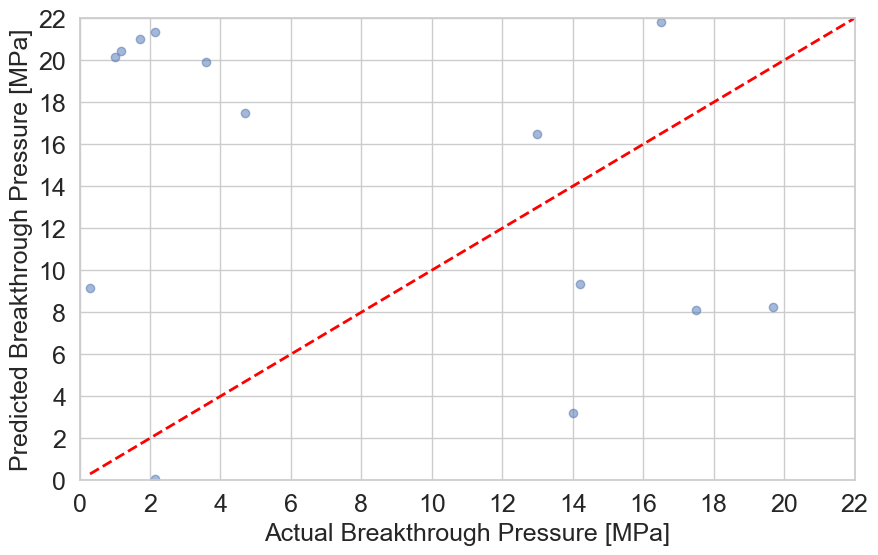

In [27]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test_3, y_pred_3, alpha=0.5)

plt.plot([y_test_3.min(), y_test_3.max()], [y_test_3.min(), y_test_3.max()], 'k--', lw=2, color='red')

plt.xlim([0, 12])
plt.ylim([0, 12])

plt.xlabel('Actual Breakthrough Pressure [MPa]', fontsize=18)
plt.ylabel('Predicted Breakthrough Pressure [MPa]', fontsize=18)
plt.title('', fontsize=18)

plt.xticks(np.arange(0, 24, 2), fontsize=18)
plt.yticks(np.arange(0, 24, 2), fontsize=18)
plt.show()

/var/folders/xp/jy5j7tmd2c7bsktzm4pdpxm40000gn/T/ipykernel_42037/1376226784.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test_4.min(), y_test_4.max()], [y_test_4.min(), y_test_4.max()], 'k--', lw=2, color='red')


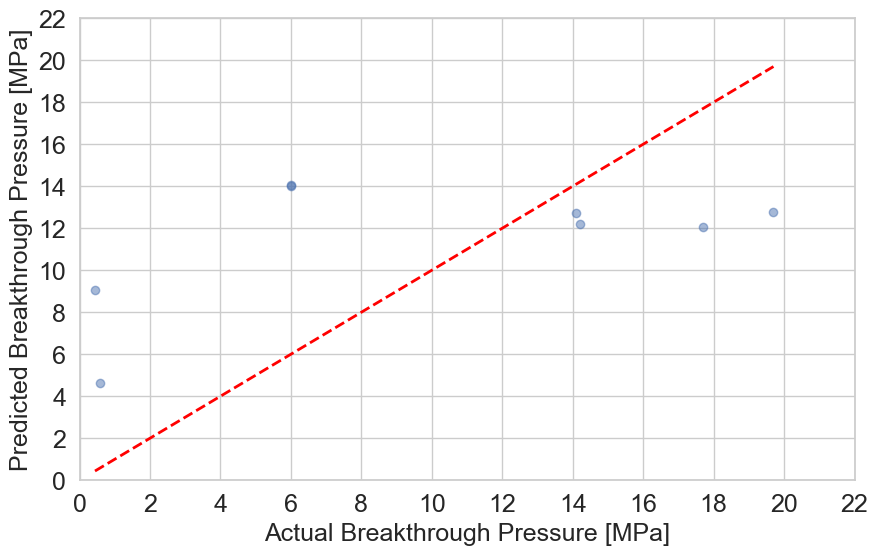

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_4, y_pred_4, alpha=0.5)

plt.plot([y_test_4.min(), y_test_4.max()], [y_test_4.min(), y_test_4.max()], 'k--', lw=2, color='red')

plt.xlim([0, 12])
plt.ylim([0, 12])

plt.xlabel('Actual Breakthrough Pressure [MPa]', fontsize=18)
plt.ylabel('Predicted Breakthrough Pressure [MPa]', fontsize=18)
plt.title('', fontsize=18)

plt.xticks(np.arange(0, 24, 2), fontsize=18)
plt.yticks(np.arange(0, 24, 2), fontsize=18)
plt.show()